In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import N_A

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from bremsstrahlung import br_dif_cs_dp_ur
from screening import fit_More_zstar

# Style of the plot
plt.style.use('../../utils/minimal.style')
from helper_plots import ticks_real

In [2]:
# Physical parameters
Z = 47
T1 = 1.e5 # 100 MeV
g1 = 1. + T1 / 511.

In [3]:
# Provide details on the plasma density
A = 63.546
rho = 8.96 # g/cm^3
ni = 1.e6 * N_A * rho / A # /m^3

# Provide details on the plasma temperature
Tplasma = [0., 0.01, 0.1, 1., 100.]

# Deduce the ionization degree
Zstar = np.array([ fit_More_zstar(Z, A, rho, T) for T in Tplasma ])
N = len(Tplasma)

In [4]:
# discretization of k axis
Nk = 1000
axis_k  = np.linspace(0., g1-1., Nk)

In [5]:
# Non-relativistic cross-section with Elwert correction
cs_screen = np.zeros([N,Nk])
for i in range(N):
    cs_screen[i,:] = np.array([ br_dif_cs_dp_ur(Z, k, g1, Tplasma[i], ni, Zstar[i]) for k in axis_k ])
    cs_screen[i,:] = axis_k * cs_screen[i,:]

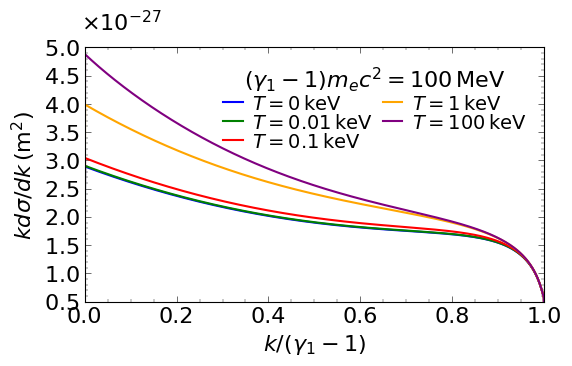

In [6]:
cc=['b','g','r','orange', 'purple']
labels=[r"$0$", r"$0.01$", r"$0.1$", r"$1$", r"$100$"]

fig, axs = plt.subplots(1, 1, figsize=(6,4))

for i in range(N):
    axs.plot(axis_k / (g1 - 1.), cs_screen[i], c=cc[i], label=r"$T=$" + labels[i]+r"$ \, \rm keV$")

axs.set_xlabel(r"$ k / (\gamma_1 - 1) $")
axs.set_xlim([0.,1.])
axs.set_ylabel(r"$ k d \sigma / dk \, \rm (m^2)$")
axs.set_ylim([0.5e-27,5.e-27])
location = np.linspace(0.5e-27, 5.e-27, 10)
axs.yaxis.set_ticks(location)
axs.yaxis.set_ticklabels([ticks_real(1.e27*elem,1) for elem in location])
axs.text(0.08, 1.1, r'$ \times 10^{-27} $', ha='center', va='center', transform=axs.transAxes, bbox=dict(alpha=0, facecolor="white", edgecolor="white") )
plt.legend(loc='best', ncol=2, title=r"$(\gamma_1-1)m_ec^2={:d} \, \rm MeV$".format(int(1.e-3*T1)))
plt.tight_layout()
fig.savefig("../figures/figure_3_8a", bbox_inches='tight')

plt.show()